***Research Areas in Computer Vision :: Evaluating the Yolact++ Architecture***



In [1]:
from google.colab import drive                        # Mounting Google Drive that contains image folders and annotations
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json, os                                       # Importing necessary python libraries
import glob, shutil, random
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

In [3]:
!pip install cython                                   # Installing necessary libraries
!pip install opencv-python pillow pycocotools matplotlib 

In [4]:
!pip install torchvision==0.5.                         # Downgrade torch to accommodate DCNv2
!pip install torch==1.4.0

     |████████████████████████████████| 4.0MB 6.8MB/s 
     |████████████████████████████████| 753.4MB 23kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101


In [5]:
!mkdir inference_images                               # Creating necessary folders
!mkdir output_images

In [6]:
!git clone https://github.com/dbolya/yolact.git       # Cloning repository

Cloning into 'yolact'...
remote: Enumerating objects: 2936, done.
remote: Total 2936 (delta 0), reused 0 (delta 0), pack-reused 2936
Receiving objects: 100% (2936/2936), 21.20 MiB | 30.32 MiB/s, done.
Resolving deltas: 100% (2003/2003), done.


In [7]:
%cd /content/yolact/external/DCNv2

!python setup.py build develop                        # Build DCNv2

/content/yolact/external/DCNv2
running build
running build_ext
building '_ext' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/content
creating build/temp.linux-x86_64-3.7/content/yolact
creating build/temp.linux-x86_64-3.7/content/yolact/external
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src/cpu
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src/cuda
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -DWITH_CUDA -I/content/yolact/exte

In [8]:
%cd /content/yolact/
!mkdir weights

/content/yolact


In [9]:
def get_path(path):                                  # Getting all image paths of a given dataset from annotations
    json_file = os.path.join(path)

    with open(json_file) as f:
        imgs_anns = json.load(f)

    images = imgs_anns["images"]
    image_paths = []
    for x in images:
        image_paths.append(x["file_name"])

    return image_paths


def move_images(src_file, dst_file, paths):         # Method to move image from one folder to another
    for path in paths:
        shutil.copy(os.path.join(src_file, path), dst_file)


***Getting three random images from the MsCoco Val 2017 for testing***

In [ ]:
json_path = "/content/drive/MyDrive/instances_val2017.json"

images = get_path(json_path)
test_images = []
for x in range(3):                                  
    img = random.choice(images)
    test_images.append(img)                         

move_images('/content/drive/MyDrive/val2017', '/content/inference_images', test_images)


***Getting three random images from the Tiny Voc Dataset for testing***

In [11]:
json_path = "/content/drive/MyDrive/tiny_voc_coco_train.json"

images = get_path(json_path)
test_images = []
for x in range(3):                                
    img = random.choice(images)
    test_images.append(img)                        

move_images('/content/drive/MyDrive/voc_train_images', '/content/inference_images', test_images)


***Run Evaluation for samples***

In [13]:
!python eval.py --trained_model=weights/yolact_plus_base_54_800000.pth --score_threshold=0.5 --top_k=15 --images=/content/inference_images:/content/output_images

Config not specified. Parsed yolact_plus_base_config from the file name.

Loading model... Done.

/content/inference_images/2009_001775.jpg -> /content/output_images/2009_001775.png
/content/inference_images/2009_000628.jpg -> /content/output_images/2009_000628.png
/content/inference_images/2008_002504.jpg -> /content/output_images/2008_002504.png
Traceback (most recent call last):
  File "eval.py", line 1105, in <module>
    evaluate(net, dataset)
  File "eval.py", line 885, in evaluate
    evalimages(net, inp, out)
  File "eval.py", line 623, in evalimages
    evalimage(net, path, out_path)
  File "eval.py", line 596, in evalimage
    frame = torch.from_numpy(cv2.imread(path)).cuda().float()
TypeError: expected np.ndarray (got NoneType)


/content/output_images/2008_002504.png


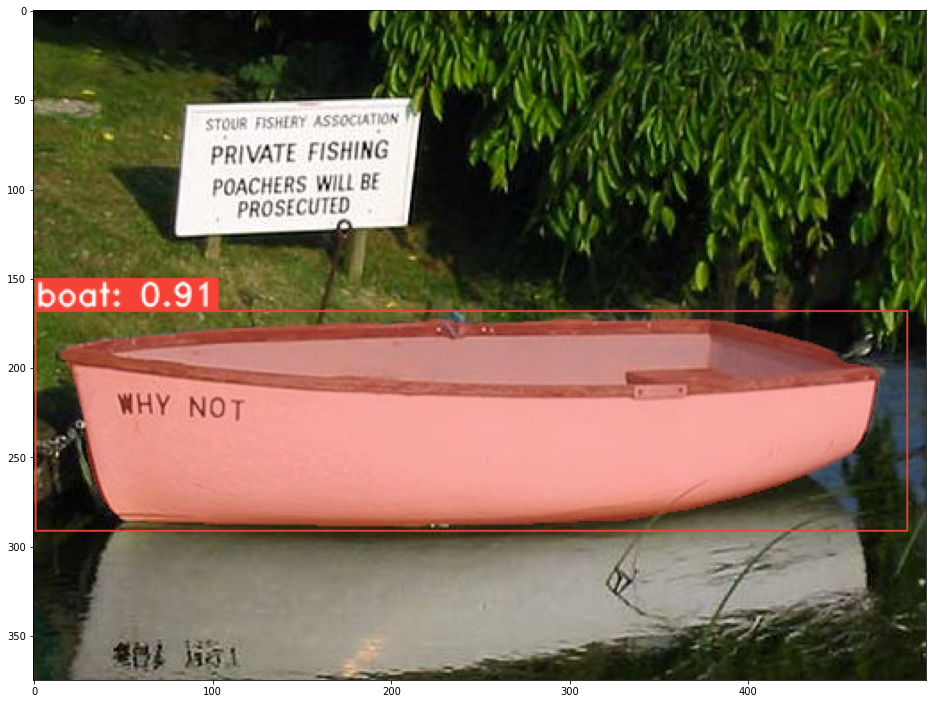

/content/output_images/2009_001775.png


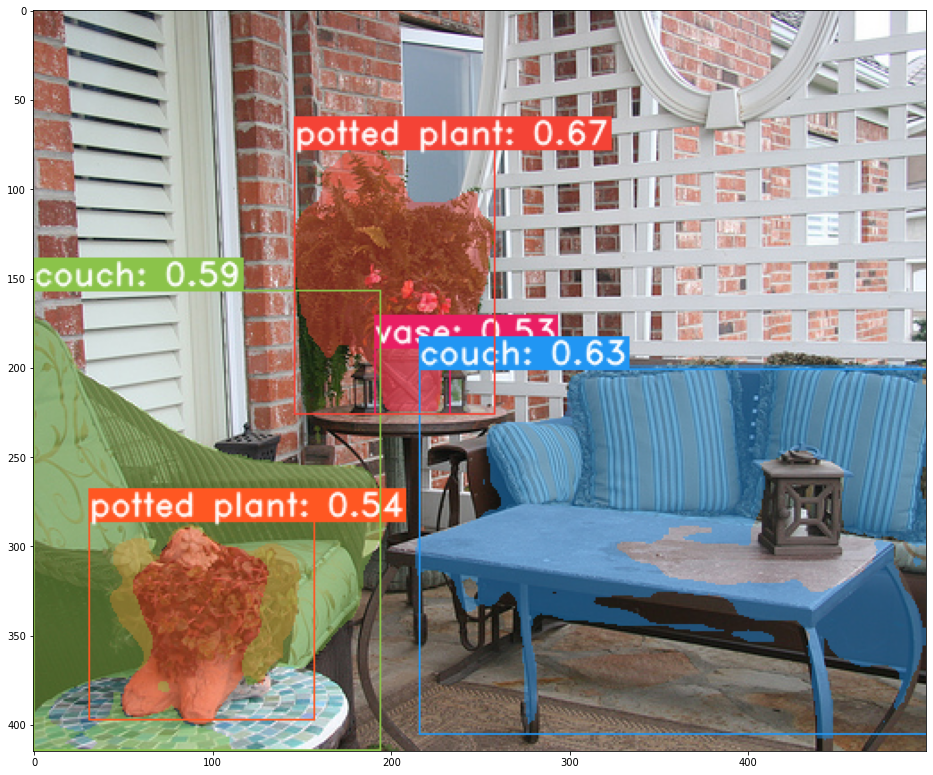

/content/output_images/2009_000628.png


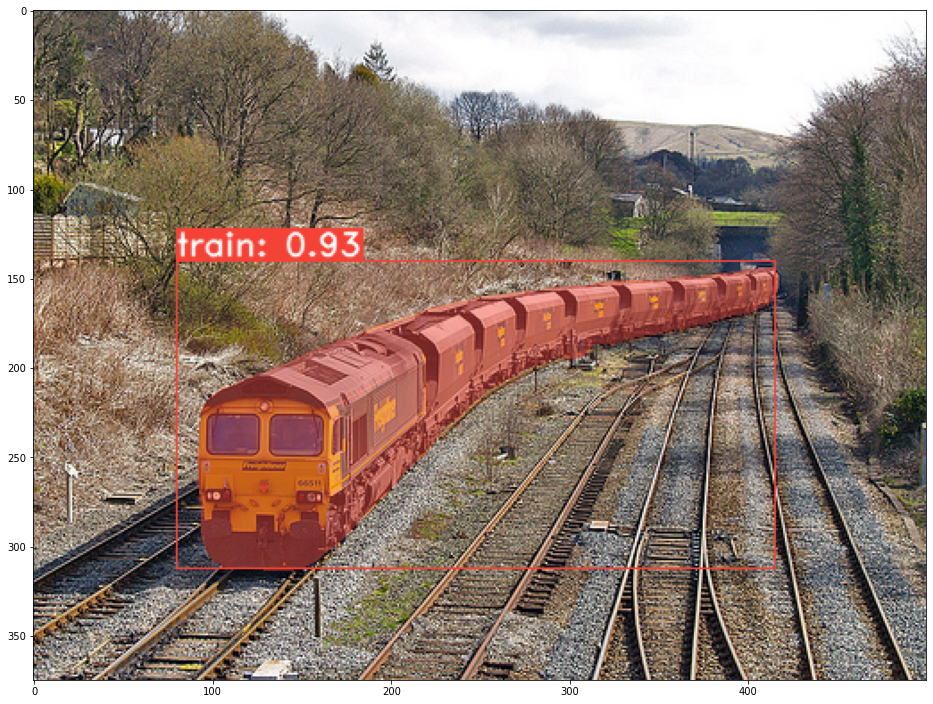

In [14]:
output_images = Path('/content/output_images')

def show_images(img_path):
    img = cv2.imread(img_path)
    img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(16,16))
    plt.imshow(img_cvt)
    plt.show()

for img_path in output_images.iterdir():
    print(img_path)
    show_images(str(img_path))


***Running evaluation on the entire dataset***

If running script, please change the path to the images folder and annotation folder from the config file (yolact/data/config).

In [15]:
!python eval.py --trained_model=weights/yolact_plus_base_54_800000.pth --score_threshold=0.5 --top_k=15

Config not specified. Parsed yolact_plus_base_config from the file name.

loading annotations into memory...
Done (t=0.21s)
creating index...
index created!
Loading model... Done.

Processing Images  ██████████████████████████████   1349 /   1349 (100.00%)     2.75 fps        
Saving data...
Calculating mAP...

       |  all  |  .50  |  .55  |  .60  |  .65  |  .70  |  .75  |  .80  |  .85  |  .90  |  .95  |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
   box | 17.53 | 24.52 | 24.11 | 23.72 | 22.88 | 21.98 | 20.13 | 17.42 | 13.03 |  6.70 |  0.81 |
  mask | 14.87 | 22.68 | 21.88 | 20.86 | 19.74 | 18.14 | 16.15 | 13.62 |  9.74 |  5.01 |  0.89 |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+



In [16]:
!python eval.py --trained_model=weights/yolact_plus_base_54_800000.pth --score_threshold=0.5 --top_k=15 --output_coco_json

Config not specified. Parsed yolact_plus_base_config from the file name.

loading annotations into memory...
Done (t=0.19s)
creating index...
index created!
Loading model... Done.

Processing Images  ██████████████████████████████   1349 /   1349 (100.00%)    12.14 fps        
Dumping detections...


In [17]:
!nvidia-smi

Sun May 30 15:03:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------